## Resolução do Desafio - Descubra as melhores notas de matemática do ENEM 2016
###### Descrição:
###### No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.
###### Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

### Modelo de Machine Learning baseado em Regressão Linear
##### Autor: Igor Cleto Silva de Araújo
##### linkedin.com/in/igorcleto

In [391]:
#Importação da bibliotecas utilizadas
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [392]:
#Carregamento dos arquivos de Treino e Teste para dar início à análise exploratória
#criação do dataframe de resposta
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
answer = pd.DataFrame()

In [394]:
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']

In [396]:
#Verificamos se o dataset de teste está contido em seu interior
print(set(test.columns).issubset(set(train.columns)))

True


In [397]:
#Breve visualização da disposição do dataset de teste
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [398]:
#Breve visualização da disposição do dataset de teino
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [399]:
#Analisando as amostras dos datasets acimas verificamos que no dataset de treino há colunas não numéricas
#Essas colunas não são interessantes para nosso modelo de regressão, portanto não são candidatos para features
test = test.select_dtypes(include=['int64','float64'])
test.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,41,22,3,1,1,5,1,NaN,0,NaN,...,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0
1,21,26,3,1,1,8,1,NaN,0,NaN,...,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0
2,23,21,1,1,2,0,2,3.0,0,2.0,...,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0
3,15,27,3,1,1,8,1,NaN,0,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,18,1,1,2,0,2,1.0,0,2.0,...,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0


In [400]:
#Para a realização da Regressão Linear precisamos decidir quais dados iremos tomar como base para variáveis dependentes.
#Realizamos abaixo o teste de correlação entre as colunas
col = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_ANO_CONCLUIU','TP_ENSINO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3']
test.corr()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
CO_UF_RESIDENCIA,1.000000,-0.027277,-0.223924,0.003637,0.044634,-0.055107,0.048962,0.027055,-0.046836,0.072562,...,0.135885,0.143118,-0.101718,-0.054463,0.097031,0.062417,0.072866,0.093678,0.055288,0.084533
NU_IDADE,-0.027277,1.000000,0.006029,-0.004572,-0.256723,0.679562,-0.305114,0.530718,-0.293714,-0.067555,...,-0.048229,-0.079171,0.081890,0.054020,-0.124681,-0.151605,-0.152863,-0.155038,-0.128243,-0.161202
TP_COR_RACA,-0.223924,0.006029,1.000000,0.027840,0.008878,-0.002415,-0.037259,0.023418,0.033100,-0.152762,...,-0.161977,-0.158654,0.119440,0.030188,-0.111649,-0.097166,-0.106149,-0.113439,-0.093965,-0.117604
TP_NACIONALIDADE,0.003637,-0.004572,0.027840,1.000000,0.020665,-0.021385,-0.010738,0.079272,0.012710,-0.021102,...,-0.059370,-0.079824,-0.012146,0.018637,-0.044226,-0.061297,-0.067335,-0.062960,-0.050519,-0.064910
TP_ST_CONCLUSAO,0.044634,-0.256723,0.008878,0.020665,1.000000,-0.596560,0.154720,NaN,0.527566,NaN,...,-0.112692,-0.104270,-0.019467,0.007080,-0.105960,-0.092896,-0.098006,-0.100944,-0.086928,-0.109049
TP_ANO_CONCLUIU,-0.055107,0.679562,-0.002415,-0.021385,-0.596560,1.000000,-0.428168,NaN,-0.252302,NaN,...,0.063830,0.044894,0.040844,-0.011746,0.027401,-0.006863,-0.006219,-0.004171,-0.009040,-0.001123
TP_ESCOLA,0.048962,-0.305114,-0.037259,-0.010738,0.154720,-0.428168,1.000000,-0.050253,-0.247778,0.976290,...,0.054730,0.050485,-0.036728,-0.016245,0.059388,0.090019,0.090184,0.102471,0.084356,0.097388
TP_ENSINO,0.027055,0.530718,0.023418,0.079272,NaN,NaN,-0.050253,1.000000,NaN,-0.032146,...,-0.094929,-0.070557,0.065490,0.087879,-0.120581,-0.159612,-0.155955,-0.157010,-0.122173,-0.160772
IN_TREINEIRO,-0.046836,-0.293714,0.033100,0.012710,0.527566,-0.252302,-0.247778,NaN,1.000000,NaN,...,-0.032181,-0.004934,-0.048790,-0.008688,-0.002073,-0.013833,-0.023881,-0.019524,-0.004485,-0.014277
TP_DEPENDENCIA_ADM_ESC,0.072562,-0.067555,-0.152762,-0.021102,NaN,NaN,0.976290,-0.032146,NaN,1.000000,...,0.286145,0.274803,-0.136473,-0.039044,0.234154,0.225320,0.232888,0.253560,0.255042,0.272487


In [401]:
#É verificado que que os campos NU_IDADE e IN_TREINEIRO não possuem uma boa correlação com as demais colunas
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
print(features)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']


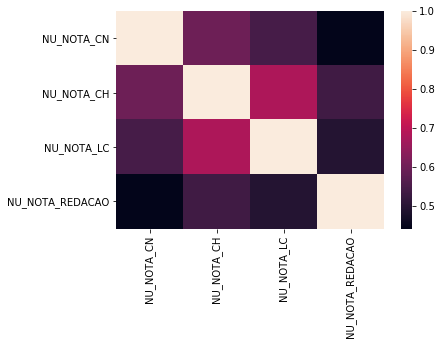

In [402]:
#Também é verificado de forma gráfica através da biblioteca seaborn
sbn.heatmap(test[features].corr())

In [403]:
train.dropna(inplace=True)

In [404]:
train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [405]:
test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [406]:
test[features] = test[features].fillna(0)

In [407]:
test[features][:]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,320.0
...,...,...,...,...
4571,398.3,558.2,511.6,500.0
4572,427.6,579.7,471.1,520.0
4573,639.2,643.8,604.9,640.0
4574,427.1,467.9,540.2,520.0


In [136]:
#Substituindo o data missing pela media da coluna
train['NU_NOTA_MT'].fillna(train['NU_NOTA_MT'].mean(), inplace=True)
train['NU_NOTA_CN'].fillna(train['NU_NOTA_CN'].mean(), inplace=True)
train['NU_NOTA_CH'].fillna(train['NU_NOTA_CH'].mean(), inplace=True)
train['NU_NOTA_LC'].fillna(train['NU_NOTA_LC'].mean(), inplace=True)
train['NU_NOTA_REDACAO'].fillna(train['NU_NOTA_REDACAO'].mean(), inplace=True)
train['NU_NOTA_COMP5'].fillna(train['NU_NOTA_COMP5'].mean(), inplace=True)
train['NU_NOTA_COMP4'].fillna(train['NU_NOTA_COMP4'].mean(), inplace=True)
train['NU_NOTA_COMP3'].fillna(train['NU_NOTA_COMP3'].mean(), inplace=True)
train['NU_NOTA_COMP2'].fillna(train['NU_NOTA_COMP2'].mean(), inplace=True)
train['NU_NOTA_COMP1'].fillna(train['NU_NOTA_COMP1'].mean(), inplace=True)
train['TP_DEPENDENCIA_ADM_ESC'].fillna(train['TP_DEPENDENCIA_ADM_ESC'].mean(), inplace=True)

test['NU_NOTA_LC'].fillna(train['NU_NOTA_LC'].mean(), inplace=True)
test['NU_NOTA_CN'].fillna(test['NU_NOTA_CN'].mean(), inplace=True)
test['NU_NOTA_CH'].fillna(test['NU_NOTA_CH'].mean(), inplace=True)
test['NU_NOTA_REDACAO'].fillna(test['NU_NOTA_REDACAO'].mean(), inplace=True)
test['NU_NOTA_COMP5'].fillna(test['NU_NOTA_COMP5'].mean(), inplace=True)
test['NU_NOTA_COMP4'].fillna(test['NU_NOTA_COMP4'].mean(), inplace=True)
test['NU_NOTA_COMP3'].fillna(test['NU_NOTA_COMP3'].mean(), inplace=True)
test['NU_NOTA_COMP2'].fillna(test['NU_NOTA_COMP2'].mean(), inplace=True)
test['NU_NOTA_COMP1'].fillna(test['NU_NOTA_COMP1'].mean(), inplace=True)
test['TP_DEPENDENCIA_ADM_ESC'].fillna(test['TP_DEPENDENCIA_ADM_ESC'].mean(), inplace=True)

In [473]:
x_train, x_test, y_train, y_test = train_test_split(train[features],train['NU_NOTA_MT'],test_size=0.17)

In [474]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_answer = lm.predict(test[features])

In [475]:
print(pred_answer)

[444.63619125 441.20894225 565.28153873 ... 595.16852049 460.49514416
  49.53094785]


In [476]:
pred_answer.shape

(4576,)

In [477]:
print(answer)

                                  NU_INSCRICAO  NU_NOTA_MT
0     73ff9fcc02f0a99919906c942c2e1a1042cdcf98  441.793960
1     71a95f9f1b91a82c65ad94abbdf9f54e6066f968  465.118551
2     b38a03232f43b11c9d0788abaf060f7366053b6d  517.226160
3     70b682d9a3636be23f6120fa9d6b164eb3c6002d  155.731196
4     715494628a50142ce8cb17191cfe6d0f3cae0934  508.785035
...                                        ...         ...
4571  dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b  447.542764
4572  a75fa8770257e7c9368d059fe53d9ef431f4bdef  446.284440
4573  655fa6306720ff16e825903b5422a46608a77545  556.896501
4574  1f4bc3e3d56212d500625bfe8ac78ccff4362293  469.071070
4575  adf0d15b54317b6564ef56dad2b775bbb0ef50cc  155.731196

[4576 rows x 2 columns]


In [478]:
answer['NU_NOTA_MT'] = pred_answer

In [479]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,444.636191
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.208942
2,b38a03232f43b11c9d0788abaf060f7366053b6d,565.281539
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,49.530948
4,715494628a50142ce8cb17191cfe6d0f3cae0934,561.790658


In [480]:
answer.to_csv('answer.csv', index=False)